In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.tools.plotting import autocorrelation_plot
import scipy as sp

In [100]:
df = pd.read_excel('Crude Oil Prices Daily.xlsx')
df = df.fillna(df.bfill())
print(df.dtypes)
df.head()

Date             datetime64[ns]
Closing Value           float64
dtype: object


,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


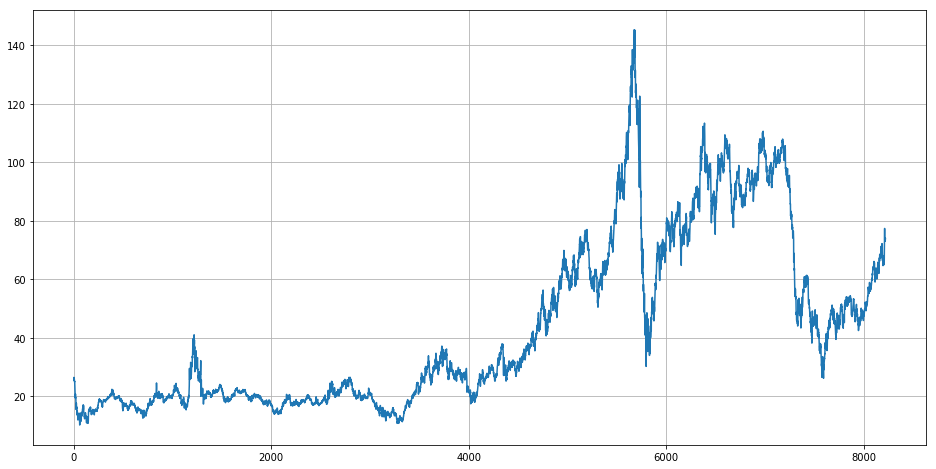

In [101]:
df['Closing Value'].plot(figsize = (16, 8), grid = True)

## ACF

In [102]:
index = np.array(df['Closing Value'].index)
n = index.size

#own autocorrelation function

def autocorrelation(x):
    x = np.array(x)
    Rk = np.array([])
    for k in index:
        Rk = np.append(Rk, (((x[k + 1 : ] - x.mean()) * (x[1 : n - k] - x.mean())).sum())/(((x - x.mean())**2).sum()))
    return Rk

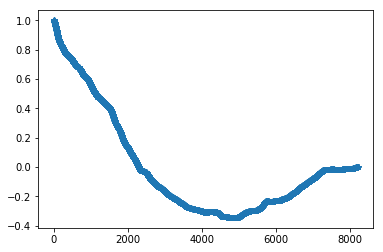

In [103]:
corr = autocorrelation(df['Closing Value'])
plt.plot(corr, '*')

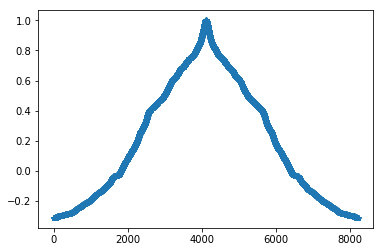

In [104]:
#numpy

y = df['Closing Value'] - df['Closing Value'].mean()
accor = np.correlate(y, y,mode = 'same')/np.sum(y**2)
plt.plot(accor,'*')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  app.launch_new_instance()


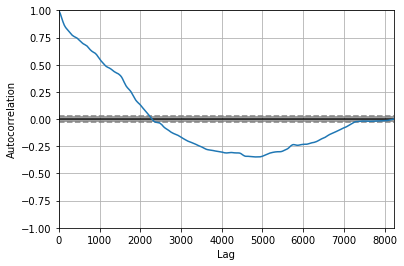

In [105]:
#pandas

autocorrelation_plot(df['Closing Value'])

16445

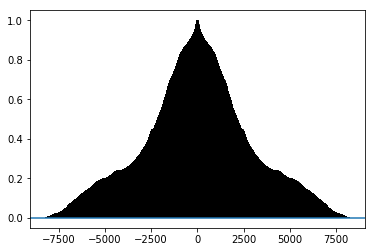

In [106]:
#matplotlib

lag, autocorr, line, b = plt.acorr(df['Closing Value'], maxlags = df['Closing Value'].count() - 1)
autocorr.size

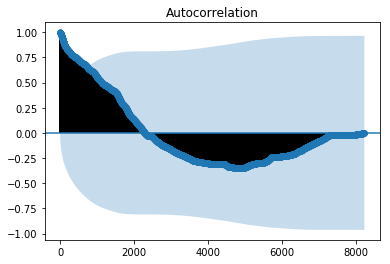

In [107]:
#statsmodels

plot_acf(df['Closing Value'])
plt.show()

## PACF

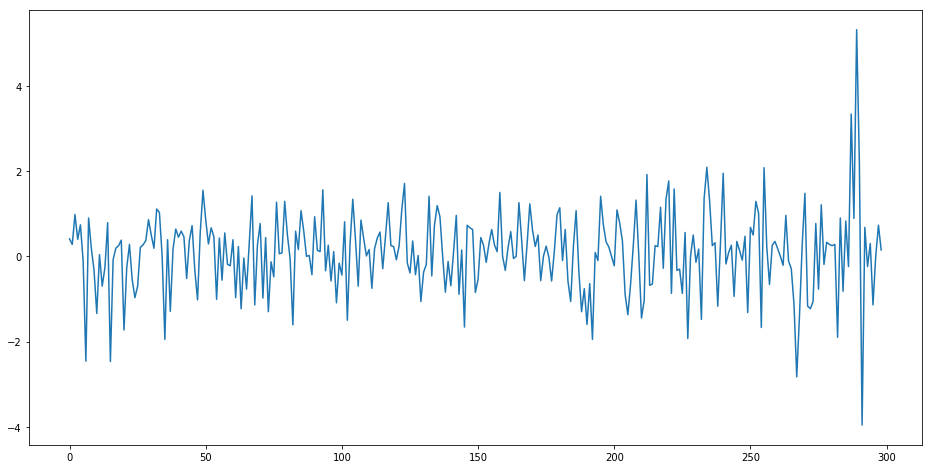

In [108]:
#deleting trend

lags = 300
del_trend = np.diff(df['Closing Value'].tail(lags))
plt.figure(figsize = (16, 8))
plt.plot(del_trend, )

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


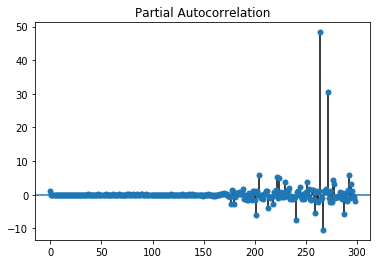

In [109]:
plot_pacf(del_trend, lags=lags)
plt.show()

In [110]:
percent = 0.95
t_gamma = lambda percent, degree:sp.stats.t.ppf((1+percent)/2,degree-1)
t_95 = pd.Series(range(lags)).apply(lambda degree:sp.stats.t.ppf((1+percent)/2,degree))
interval = (np.mean(del_trend) - t_95*np.std(del_trend)/lags**0.5,np.mean(del_trend)+ t_95*np.std(del_trend)/lags**0.5)

In [111]:
def autocorrelation_analysis(del_trend):
    outliers = np.array([])
    k = 0
    for i in range(del_trend.size//2):
        if (del_trend[i] > interval[1][i]) or (del_trend[i] < interval[0][i]):
            k = k+1
            outliers = np.append(outliers, del_trend[i])
    if k!=0: print('Signal is periodic and first 10 outliers(periods) are :')
    else:
        print('signal is not periodic')
    return outliers[:10]
autocorrelation_analysis(del_trend)

Signal is periodic and first 10 outliers(periods) are :


array([ 0.98,  0.4 ,  0.74, -0.11, -2.46,  0.9 , -0.33, -1.34, -0.7 ,
       -0.26])